In [3]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  


In [5]:
X=6 * np.random.rand(100,1)-3
y=0.5 * X**2 + 1.5*X +2 + np.random.randn(100,1)

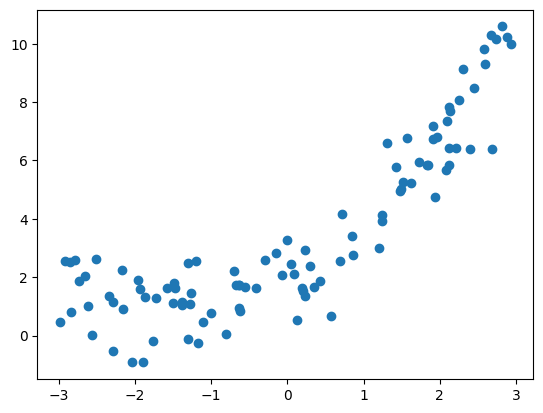

In [7]:
plt.scatter(X,y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [12]:
X_train

array([[-1.28331347e+00],
       [-4.15669704e-01],
       [ 1.43179553e+00],
       [ 2.11902055e+00],
       [-6.81237723e-01],
       [-1.29959871e+00],
       [ 1.49782306e+00],
       [ 4.89758108e-02],
       [-2.17867703e+00],
       [ 2.74467266e+00],
       [ 2.98302658e-01],
       [-1.47372922e+00],
       [ 2.67799851e+00],
       [-2.79580437e+00],
       [ 2.24972359e+00],
       [-2.44667157e-03],
       [ 1.91731739e+00],
       [-2.73330097e+00],
       [ 1.52073285e+00],
       [ 2.12648264e+00]])

In [11]:
regression.fit(X_train,y_train)

LinearRegression()

In [17]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,regression.predict(X_test))

In [18]:
r2

0.66626142865728

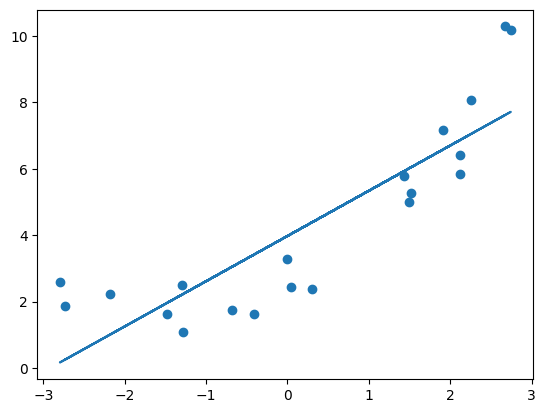

In [20]:
plt.plot(X_train,regression.predict(X_train))
plt.scatter(X_train,y_train)

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)


In [25]:
X_train_poly

array([[ 1.00000000e+00, -1.28331347e+00,  1.64689346e+00],
       [ 1.00000000e+00, -4.15669704e-01,  1.72781303e-01],
       [ 1.00000000e+00,  1.43179553e+00,  2.05003844e+00],
       [ 1.00000000e+00,  2.11902055e+00,  4.49024809e+00],
       [ 1.00000000e+00, -6.81237723e-01,  4.64084836e-01],
       [ 1.00000000e+00, -1.29959871e+00,  1.68895682e+00],
       [ 1.00000000e+00,  1.49782306e+00,  2.24347392e+00],
       [ 1.00000000e+00,  4.89758108e-02,  2.39863004e-03],
       [ 1.00000000e+00, -2.17867703e+00,  4.74663361e+00],
       [ 1.00000000e+00,  2.74467266e+00,  7.53322799e+00],
       [ 1.00000000e+00,  2.98302658e-01,  8.89844756e-02],
       [ 1.00000000e+00, -1.47372922e+00,  2.17187780e+00],
       [ 1.00000000e+00,  2.67799851e+00,  7.17167604e+00],
       [ 1.00000000e+00, -2.79580437e+00,  7.81652205e+00],
       [ 1.00000000e+00,  2.24972359e+00,  5.06125621e+00],
       [ 1.00000000e+00, -2.44667157e-03,  5.98620178e-06],
       [ 1.00000000e+00,  1.91731739e+00

In [26]:
X_test_poly

array([[ 1.00000000e+00, -6.41770030e-01,  4.11868771e-01],
       [ 1.00000000e+00, -2.61414817e+00,  6.83377063e+00],
       [ 1.00000000e+00,  1.84797921e+00,  3.41502715e+00],
       [ 1.00000000e+00,  1.98333947e-01,  3.93363546e-02],
       [ 1.00000000e+00,  2.58458103e+00,  6.68005910e+00],
       [ 1.00000000e+00,  1.62394630e+00,  2.63720158e+00],
       [ 1.00000000e+00, -6.41114495e-01,  4.11027796e-01],
       [ 1.00000000e+00, -1.20285369e+00,  1.44685700e+00],
       [ 1.00000000e+00, -2.28852909e+00,  5.23736538e+00],
       [ 1.00000000e+00, -2.98783807e+00,  8.92717630e+00],
       [ 1.00000000e+00,  6.93716239e-01,  4.81242220e-01],
       [ 1.00000000e+00,  1.99918026e-01,  3.99672169e-02],
       [ 1.00000000e+00,  2.82320414e+00,  7.97048163e+00],
       [ 1.00000000e+00,  1.31867519e-01,  1.73890426e-02],
       [ 1.00000000e+00,  8.60938758e-01,  7.41215544e-01],
       [ 1.00000000e+00, -2.86110010e+00,  8.18589380e+00],
       [ 1.00000000e+00,  1.93592358e+00

In [27]:
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
r2=r2_score(y_test,y_pred)
r2

0.8414944521515695

In [28]:
regression.coef_,regression.intercept_

(array([[0.        , 1.30106466, 0.48985052]]), array([2.39318563]))

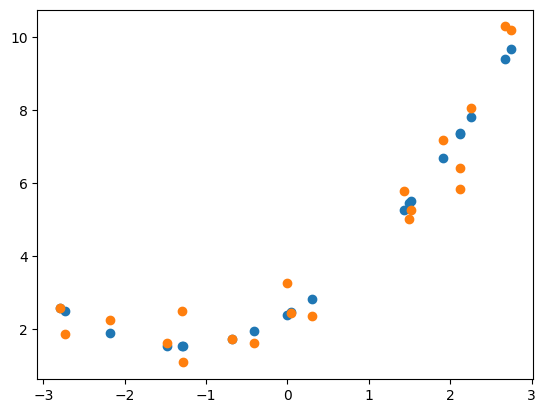

In [35]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)


In [38]:
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new=regression.predict(X_new_poly)

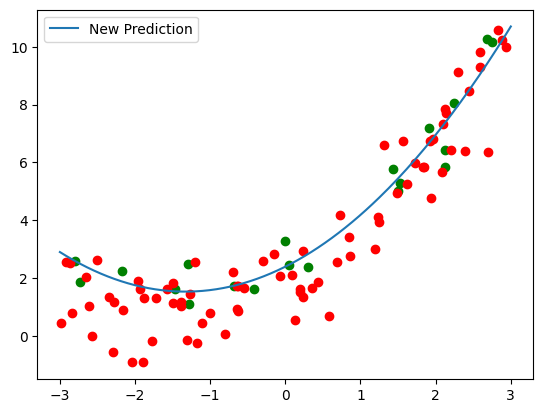

In [40]:
plt.plot(X_new,y_new,label="New Prediction")
plt.scatter(X_train,y_train,color="g")
plt.scatter(X_test,y_test,color="r")
plt.legend()

pipeline Concepts

In [41]:
from sklearn.pipeline import Pipeline

In [45]:
def poly_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)
    X_new_poly=poly.transform(X_new)
    poly_features=PolynomialFeatures(degree=degree)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([("poly_features",poly_features),("lin_reg",lin_reg)])
    poly_regression.fit(X_train,y_train)
    y_pred_new=poly_regression.predict(X_new)
    plt.plot(X_new,y_pred_new,"r",label="Degree"+str(degree))
    plt.plot(X_train,y_train,"b.")
    plt.plot(X_test,y_test,"g.")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4,4,0,10])

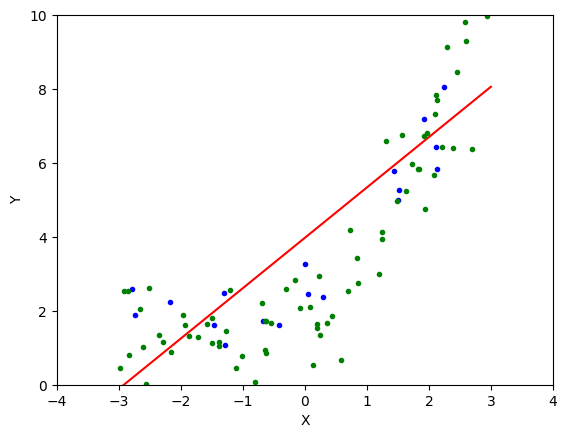

In [46]:
poly_regression(1)

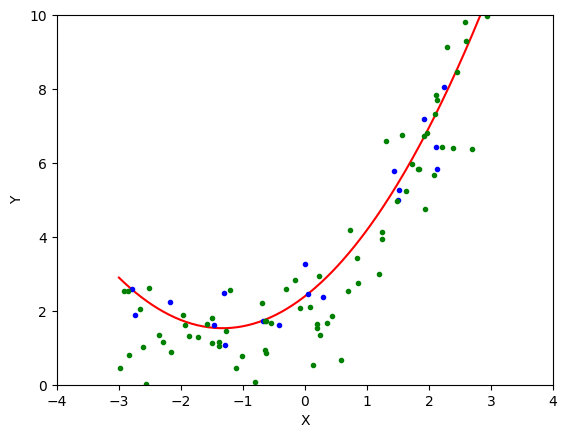

In [47]:
poly_regression(2)

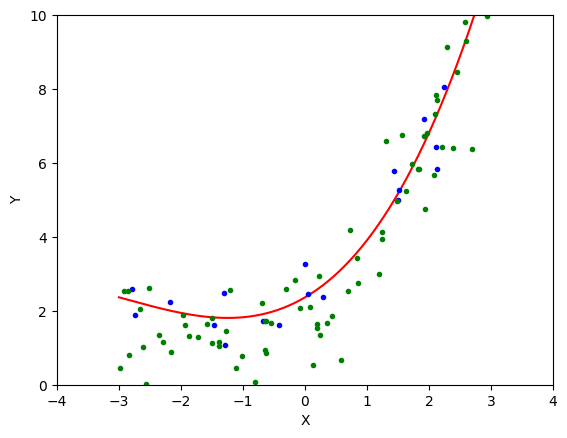

In [48]:
poly_regression(3)